# Quick demo of various ways to check if an integer is a power of two

Note that this notebook is meant to work in Python 2; recall integer division works differently in Python 3.

In [1]:
import timeit

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# assume given_num will be integers...although I think this works for float inputs, too

def power_of_two(given_num):
    testing_num = float(given_num)
    while (testing_num % 2 == 0.0) and testing_num > 1:
        testing_num = testing_num/2
        
    if (testing_num == 1):
        return True
    else:
        return False

Below is an alternate strategy which does not use the modulus function.

In [3]:
def power_of_two_multiply(n):
    assert n > 0 and int(n) == n
    
    check = 1
    while check < n:
        check *= 2
        
    if check == n:
        return True
    return False

Now we can check to see the cost of each of the methods and try to understand in what circumstances one would be preferable to the other.

In [4]:
nvec = [1, 2]
for n_power in range(2, 13):
    nbase = 2 ** n_power
    nvec.extend([nbase - 1, nbase, nbase + 1])
time1vec = []
time2vec = []
for n in nvec:
    time1vec.append(timeit.timeit('power_of_two({0})'.format(n), setup='from __main__ import power_of_two', number=100000))
    time2vec.append(timeit.timeit('power_of_two_multiply({0})'.format(n), setup='from __main__ import power_of_two_multiply', number=100000))

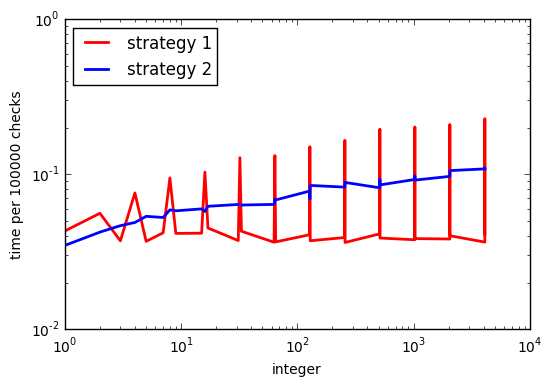

In [5]:
plt.loglog(nvec, time1vec, 'r', linewidth=2, label='strategy 1')
plt.loglog(nvec, time2vec, 'b', linewidth=2, label='strategy 2')
plt.legend(loc='upper left')
plt.xlabel('integer')
plt.ylabel('time per 100000 checks');